In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# let's import our training dataset

In [2]:
bank_train=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")

In [3]:
bank_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
column1=bank_train.columns
column1

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
bank_train["subscribed"]=bank_train["subscribed"].replace({"yes":1,"no":0})

In [6]:
bank_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [7]:
bank_train["education"].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [8]:
bank_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


As you can see there are no null values present in the dataset

In [10]:
bank_train["subscribed"].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [11]:
bank_train["job"].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

 As you can see that there are more number of people who have blue -collarj ob followed management it means this abnk is targetting these poeple or these pepole are more likely to get attracted to fixed deposit

In [12]:
bank_test=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [13]:
bank_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [14]:
column2=bank_test.columns
column2

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [15]:
bank_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

no null values are present in this dataset 

In [16]:
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
pd.crosstab(bank_train["job"],bank_train["subscribed"])

subscribed,0,1
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


As you can clearly see that people who 

In [18]:
bank_train.duplicated().sum()

0

In [19]:
bank_test.duplicated().sum()

0

In [20]:
len(bank_train.columns)

18

In [21]:
len(bank_test.columns)

17

as w know tets dataset doesn;t contain targte variabkle 

In [22]:
bank_train.shape[0]

31647

In [23]:
bank_test.shape[0]

13564

In [24]:
bank_test["job"].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

In [25]:
bank_train["default"].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [26]:
bank_train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [27]:
bank_test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [28]:
bank_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [29]:
bank_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13564.0,22704.057726,12994.043329,1.0,11546.0,22782.0,33974.25,45206.0
age,13564.0,40.887128,10.604108,18.0,33.0,39.0,48.00,95.0
balance,13564.0,1358.496535,3082.940623,-3313.0,71.0,445.0,1413.25,98417.0
day,13564.0,15.738646,8.288174,1.0,8.0,16.0,21.00,31.0
duration,13564.0,258.278679,258.488648,0.0,102.0,180.0,319.00,3253.0
campaign,13564.0,2.759510,3.060928,1.0,1.0,2.0,3.00,58.0
pdays,13564.0,41.648555,101.985178,-1.0,-1.0,-1.0,-1.00,850.0
previous,13564.0,0.594441,1.998193,0.0,0.0,0.0,0.00,55.0


As we can see from the graph that 75% and max so there maybe chance of outliers poresent in the dataset

# Let's do some graphical univariate , bivariate and multivariate analysis

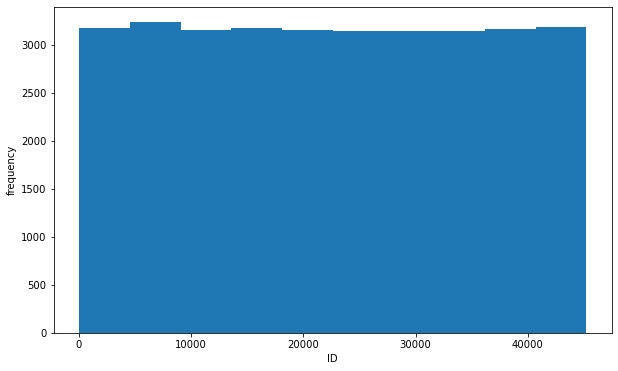

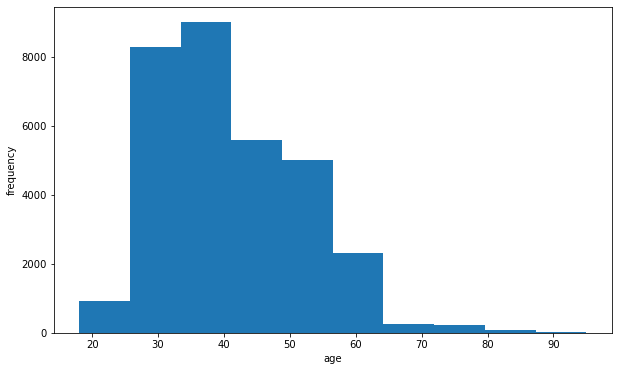

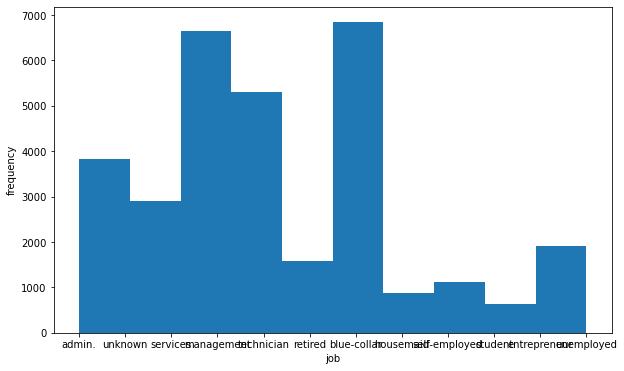

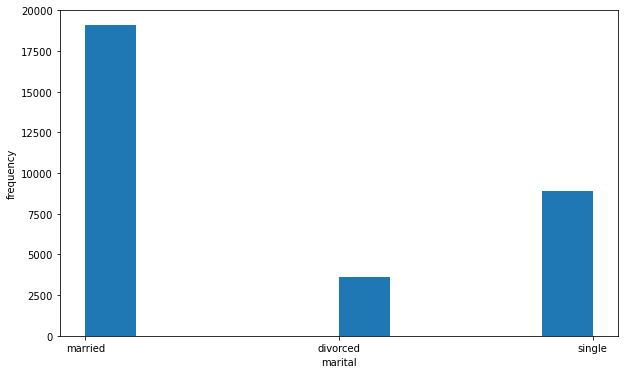

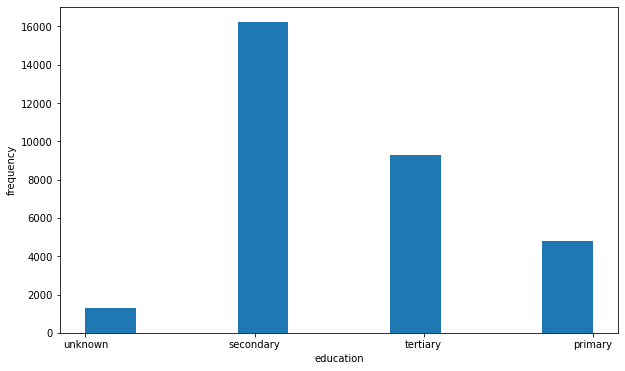

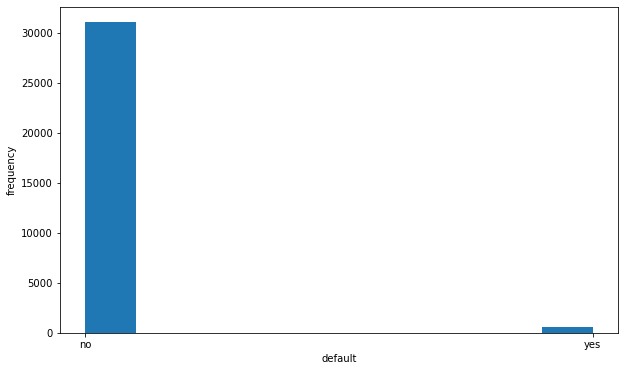

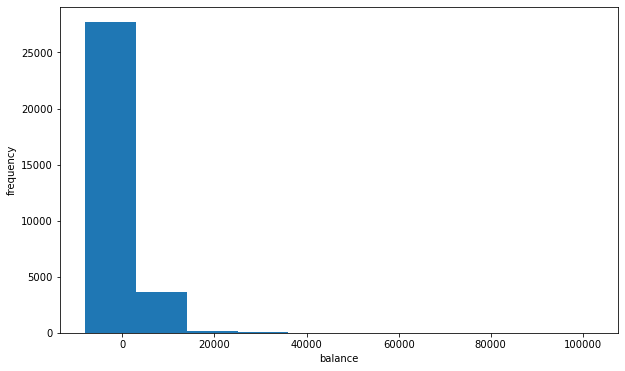

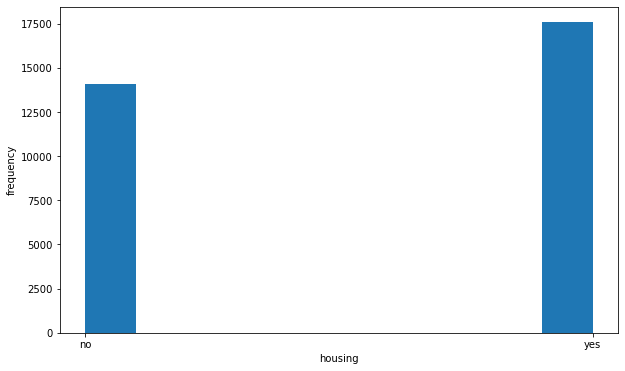

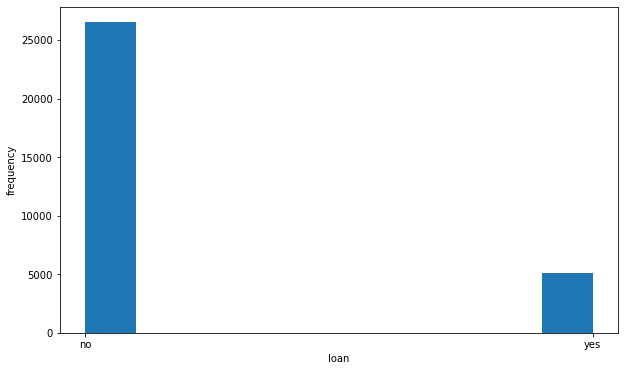

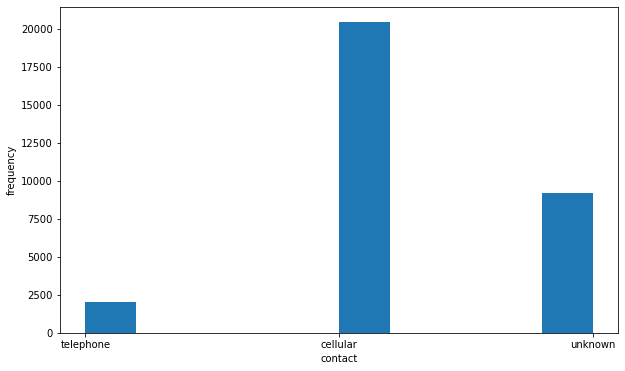

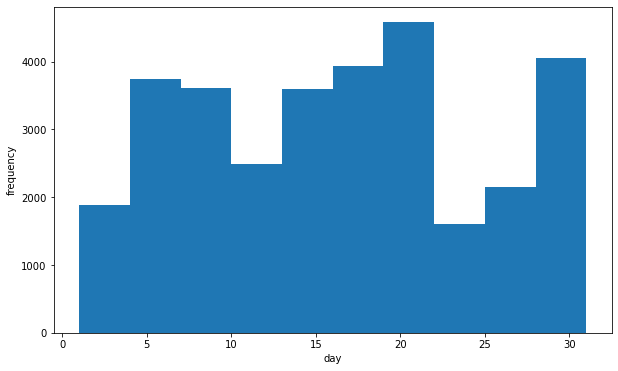

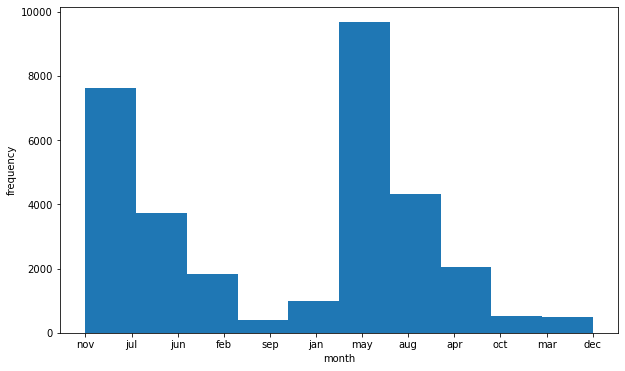

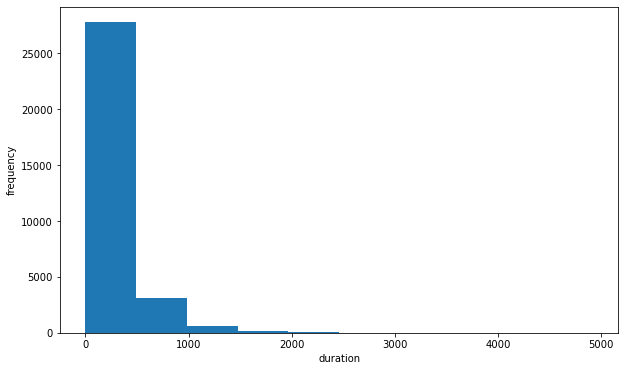

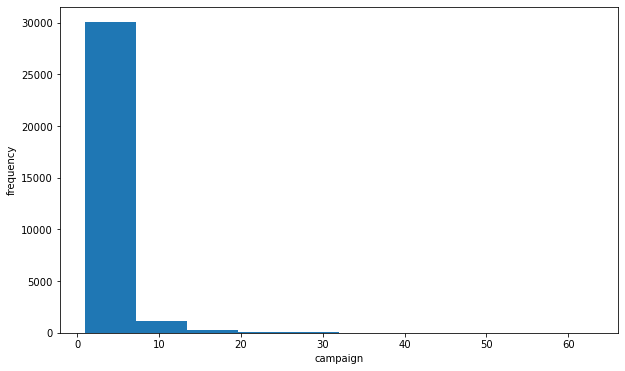

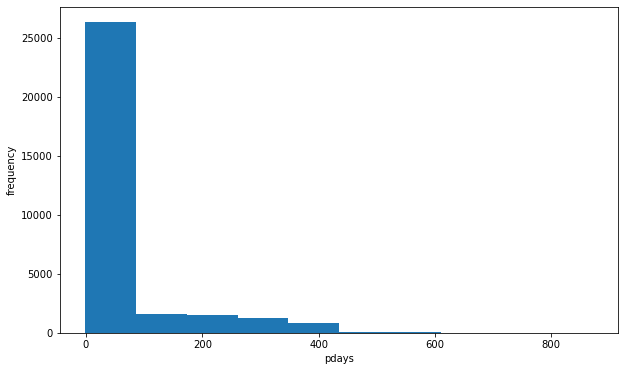

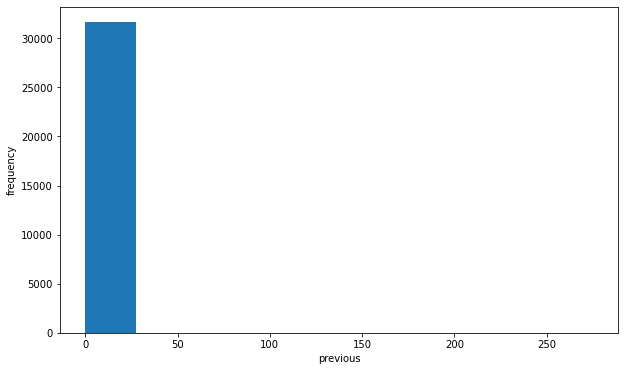

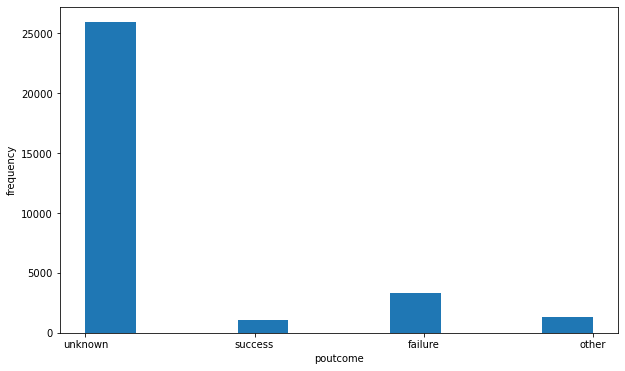

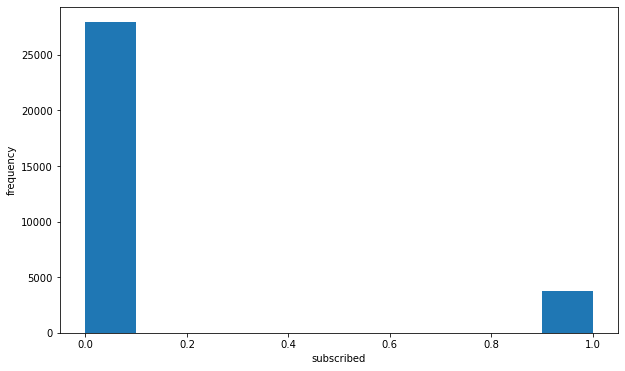

In [30]:
# let;s plot first histogram
plotnumber=1
for i in column1:
    if plotnumber<=19:
        plt.figure(figsize=(10,6))
        plt.hist(bank_train[i],bins=10)
        plt.xlabel(i)
        plt.ylabel("frequency")
        plt.show()

1. From the graph we can see that married people are as compared to single and divorced
2. maximum peple are fom age group 25 to 65 as we know genrally people likely to get job and start unvesting there money
3. maximum people are from secondary education background
4. therer atre more people who come have default have no 
5. very interesting to know maximum people have zero balance in the account which means that they are not likely to subscribed the fixed deposit 
6. maximum poeple hane no personal lloan but maximum people have hosuing loan 
7. maximum people have cellular contact
8. maximum peple have duratiom between 0 to 500 second 
9. in this dataset we can see that maximum people have not subscribed 

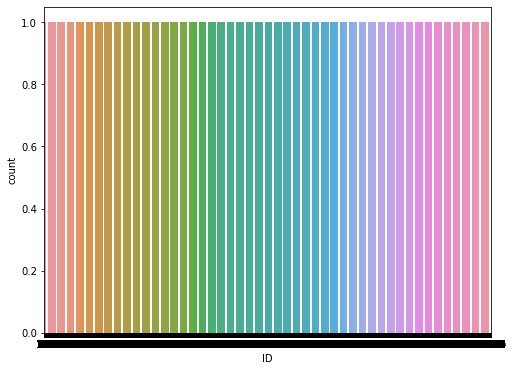

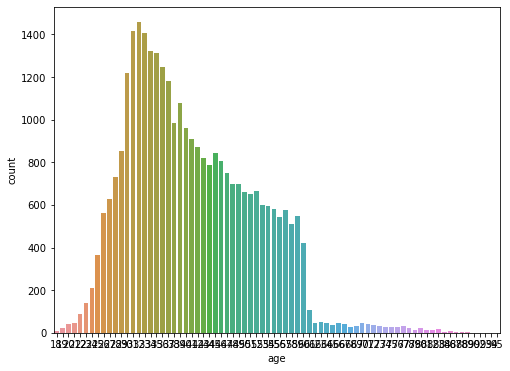

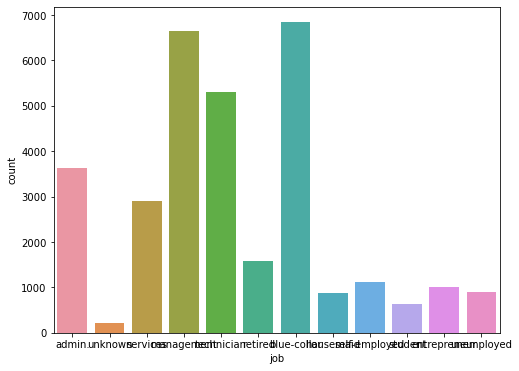

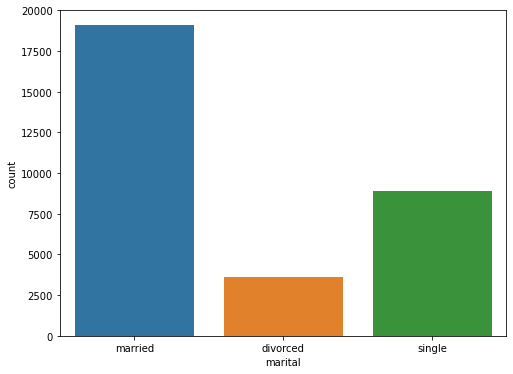

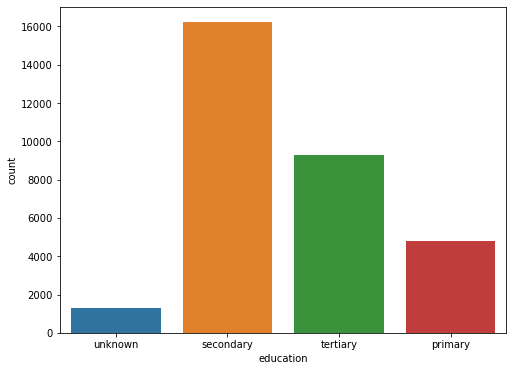

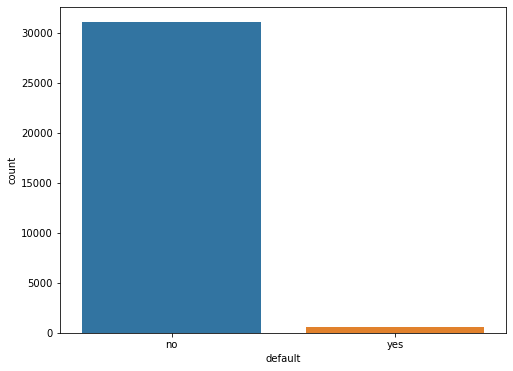

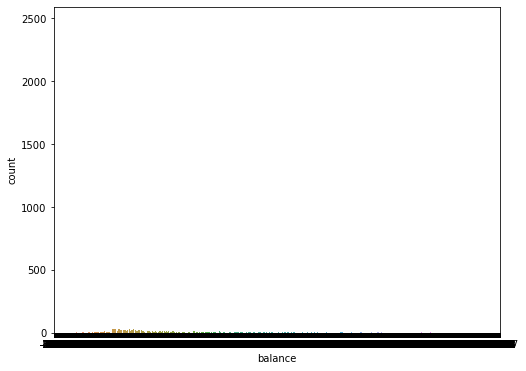

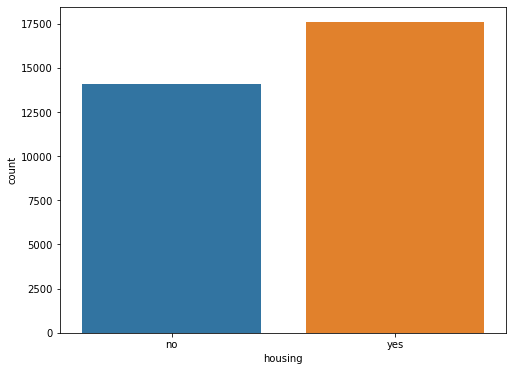

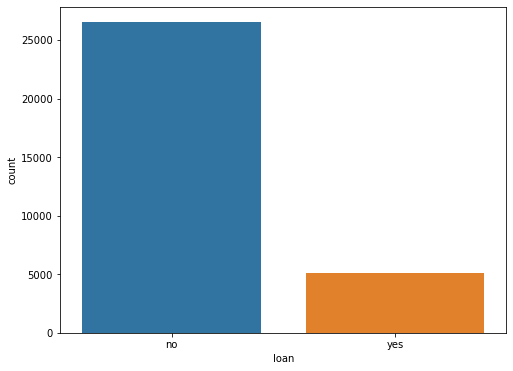

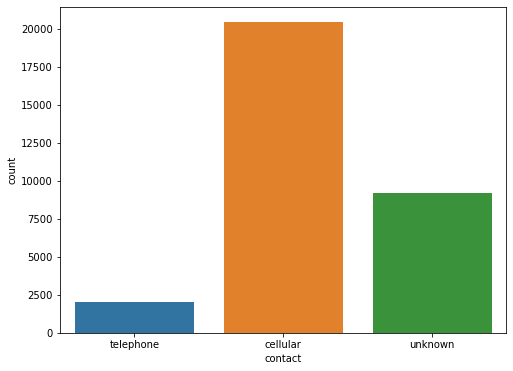

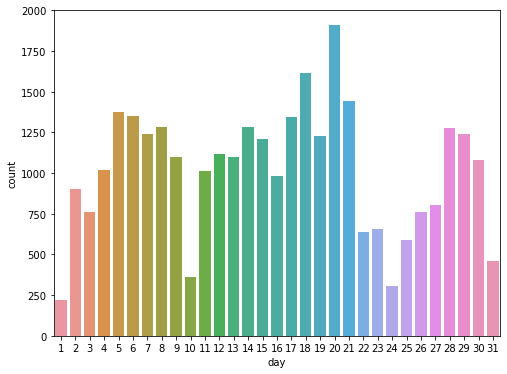

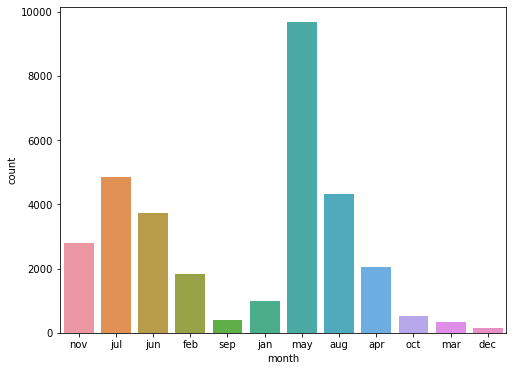

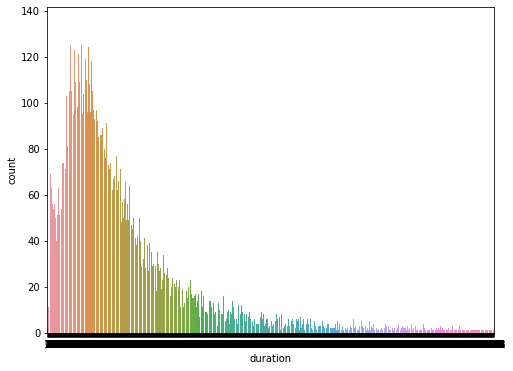

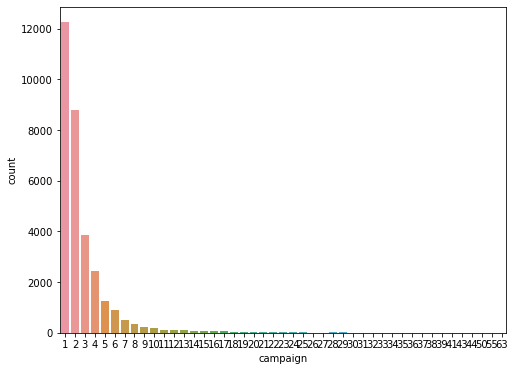

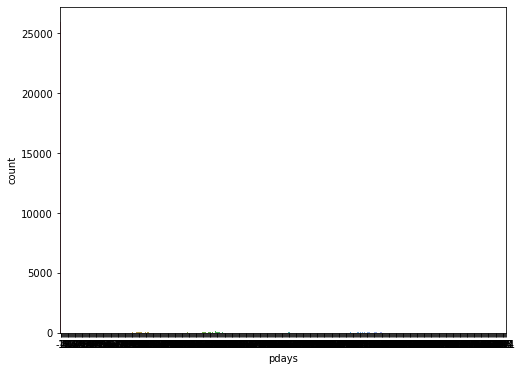

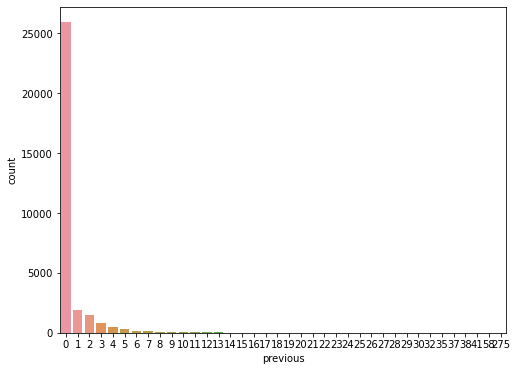

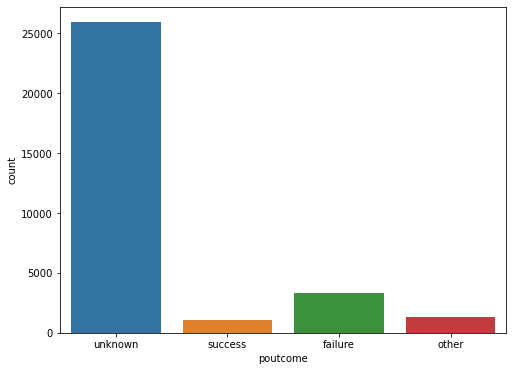

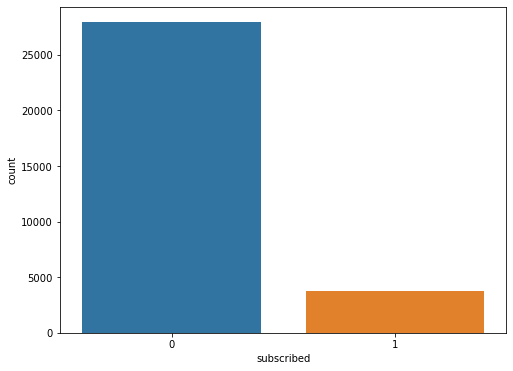

In [60]:
# let's plot count plot to see how much data each have 

%matplotlib inline
for i in column1:
    plt.figure(figsize=(8,6))
    ax=sns.countplot(data=bank_train, x=i)
    plt.xlabel(i)
    plt.show()       

 same as we can see that in the count plot

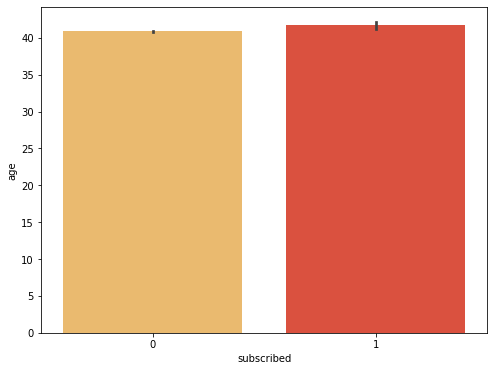

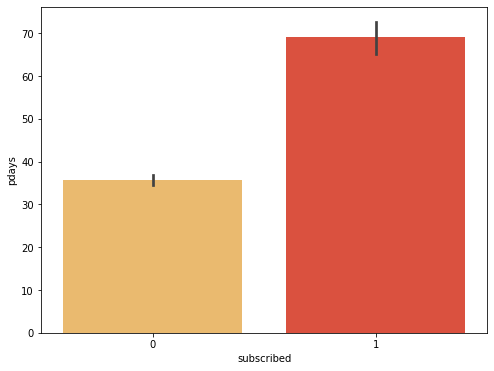

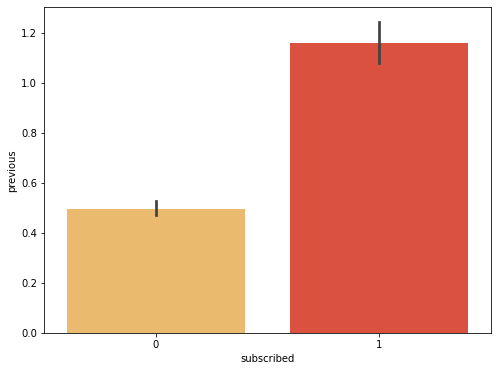

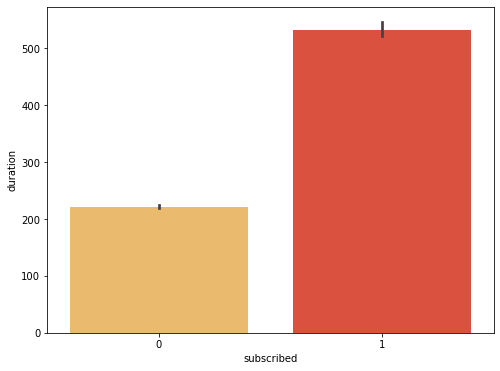

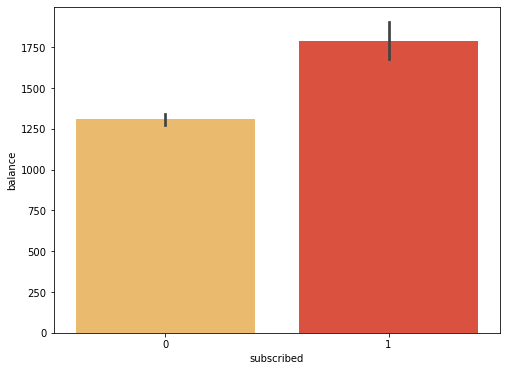

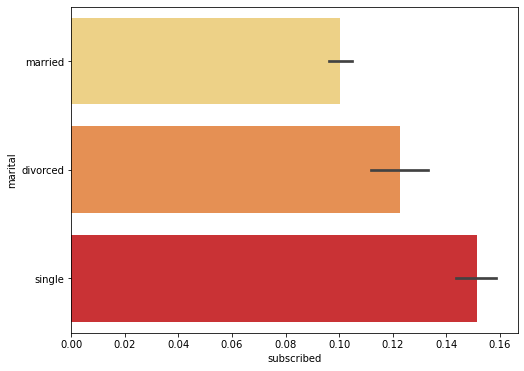

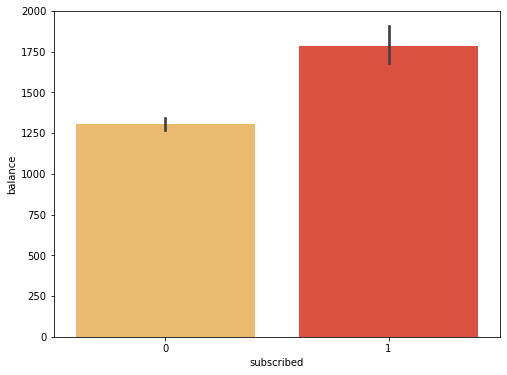

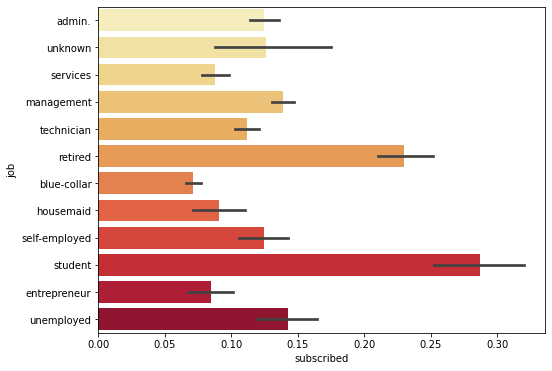

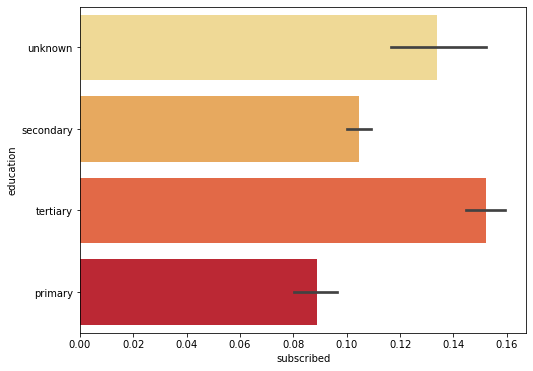

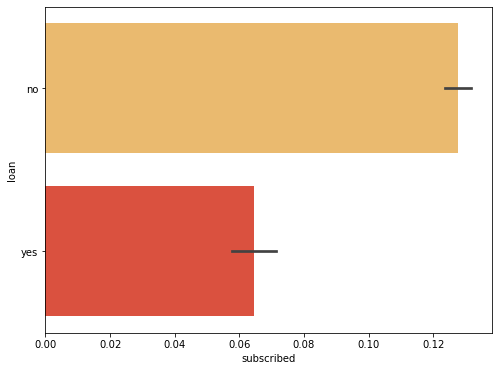

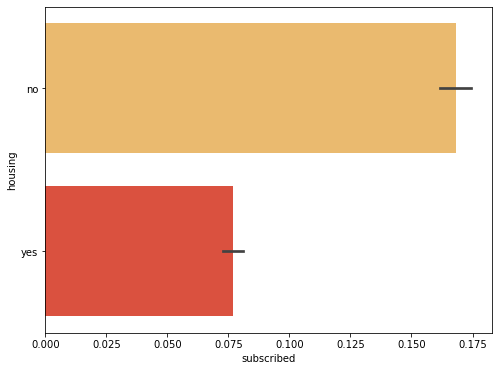

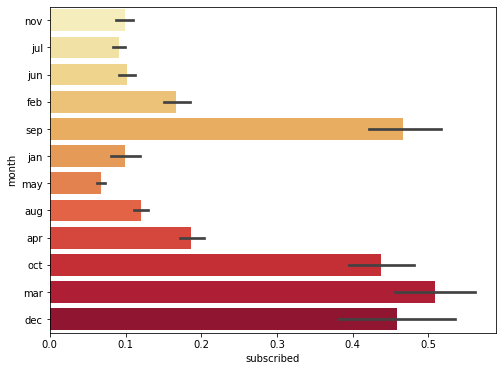

In [31]:
# let's plot bivariate analysis 
num_columns=["age","pdays","previous","duration","balance","marital","balance","job","education","loan","housing","month"]
for i in num_columns:
    plt.figure(figsize=(8,6))
    ax=sns.barplot(y=bank_train[i],x=bank_train["subscribed"],data=bank_train,palette="YlOrRd")
    plt.show()

This barplot gives us a very good insight the 
1. We are suprised to see that in the jobs many student have subscribed to the fixed deposit but there numbers are very less after that retired people have subscribed followed unemployed and mangement 
2. people who have tertiarty education have subscribed more to the fixed deposit as usual dur to there higher income and benefits follwed ny unkown and secondary
3. people who don;t have personal loan have subscibed more to fixed deposit as compared to people who has havinf loan whch tells us bank should focus in people who have no loan , beause loan phave to pay intereset rate
4. SAme in housing loan if poeple don;t have housing loan they more are likely to buy fixed eposit rather than who ahve hosuing loan 
5. As you van see in the month of march and sep many poeple have subscribed to the bank deposits 
6. As usual if the customer is previos call have higher then they likely to buy fixed deposits
7. As most important for portugesse bank if the call duration are higher they more likely to purchase the fixed deposits which is very good 
8. and in the balance also pewople who have less balance less than 1500 have less chance of sunbscribed but poeple whohave good balance they could have higher chance of subscribwed 
9. We can see singke people hae subscribed more to the fixed deposit because they are not depndent on children and wife but married poepl have to lokk for kids and wife in divorced also they are almost single mok liablility  

<Figure size 720x504 with 0 Axes>

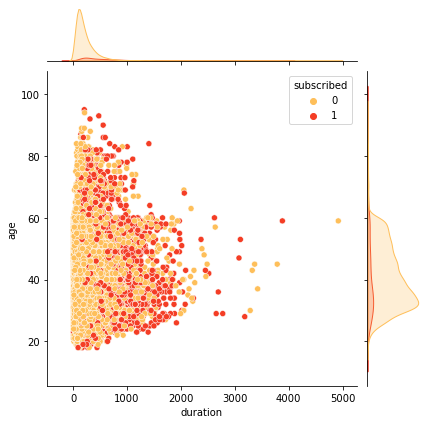

<Figure size 720x504 with 0 Axes>

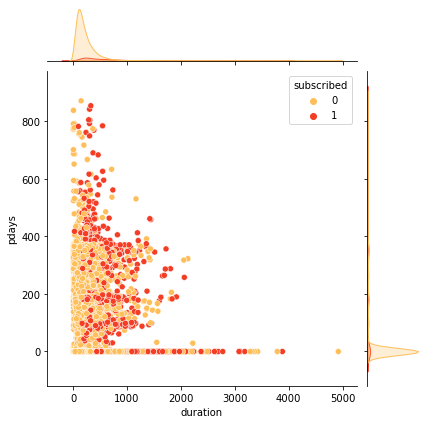

<Figure size 720x504 with 0 Axes>

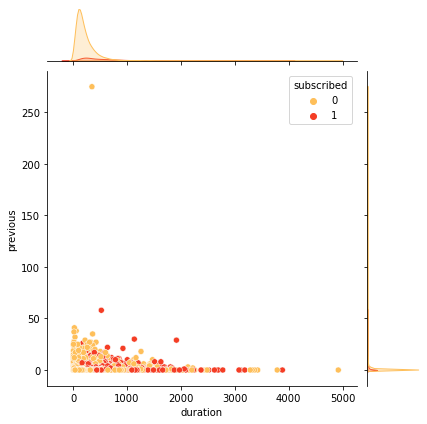

<Figure size 720x504 with 0 Axes>

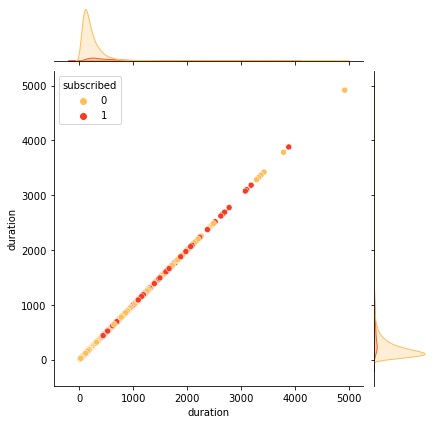

<Figure size 720x504 with 0 Axes>

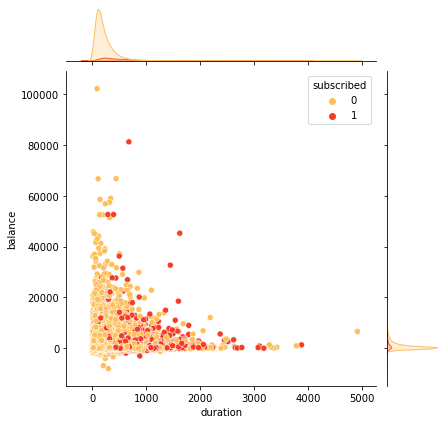

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 720x504 with 0 Axes>

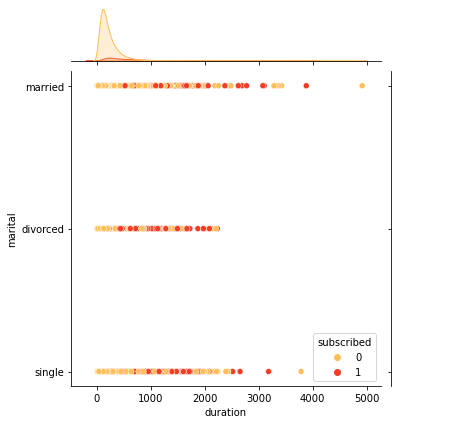

In [32]:
# let's plot some multivariate graph 
num_columns=["age","pdays","previous","duration","balance","marital","balance","job","education","loan","housing","month"]
for i in num_columns:
    plt.figure(figsize=(10,7))
    ax=sns.jointplot(y=bank_train[i],x=bank_train["duration"],hue="subscribed",data=bank_train,palette="YlOrRd")
    plt.show()

1. from tis joint plot we can see that maximum number of people whoes age is bewteen the 20 to 60 have call duration 0to 200 they have unscribed but if we see not subscribed if we increase the duration many peole have subscribed 

In [ ]:
num_columns=["age","pdays","previous","duration","balance","marital","balance","job","education","loan","housing","month"]
for i in num_columns:
    plt.figure(figsize=(20,10))
    ax=sns.scatterplot(y=bank_train[i],x=bank_train["job"],hue="subscribed",data=bank_train,palette="YlOrRd",s=50)
    plt.show()

from this graph also we are clear that
1. students in there early ages like 20 to 25 or 30 there are also trying to subscribed ti fixed depopsits so bank should focus them aslo it is very good because they not maybe have more money but youngestrs are more to spred the benefits of fixed deposit followed retired because they have pension and savings 
2. i think pevious has very less relationship with job and subscribed 
3. as you can see that duration increses in every job you can see more number people are subscribed i think duration is key factor 
4. as you can see pepople with manamgement have higher savings as compared ti any ther jobs 
5. in the loan we can see who dont have loan are come from retired and those have loan come from management 

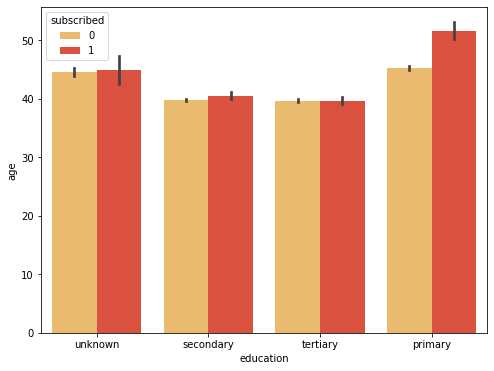

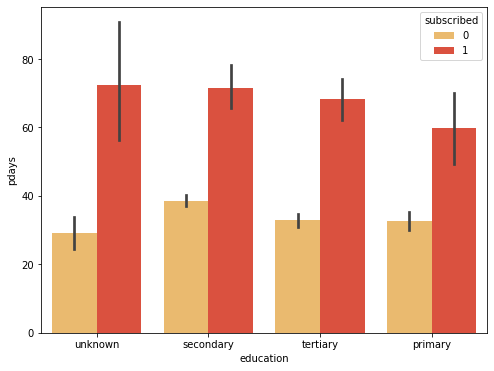

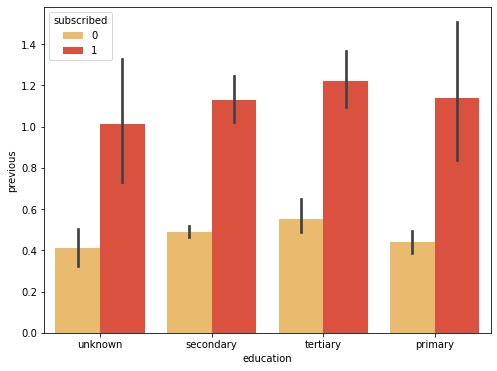

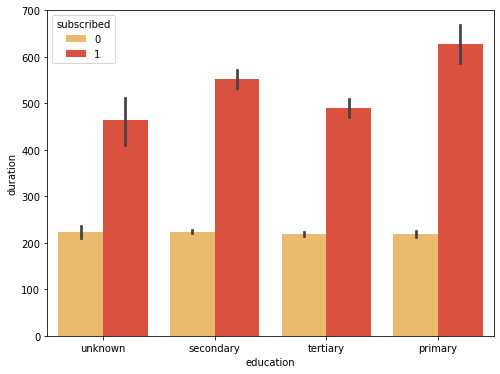

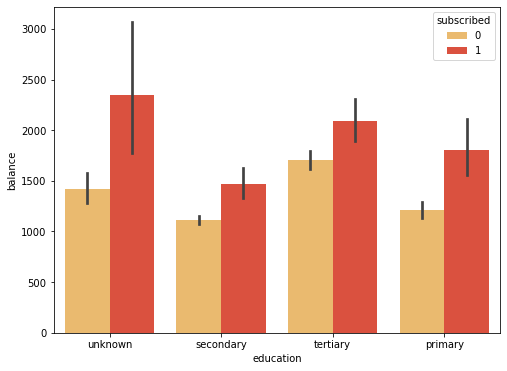

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 576x432 with 0 Axes>

In [64]:
num_columns=["age","pdays","previous","duration","balance","marital","balance","job","education","loan","housing","month"]
for i in num_columns:
    plt.figure(figsize=(8,6))
    ax=sns.barplot(y=bank_train[i],x=bank_train["education"],hue="subscribed",data=bank_train,palette="YlOrRd")
    plt.show()

useful information we gain from here that 
1. if we see that primary , secondary and tertiary education all of them subscribed to the fixed deposit when there pdays, previous , and duration are very high smilarly for balance also we can say that  

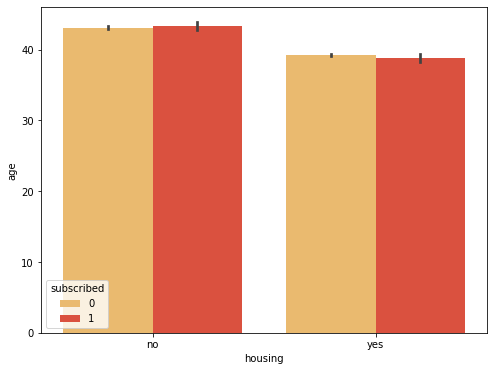

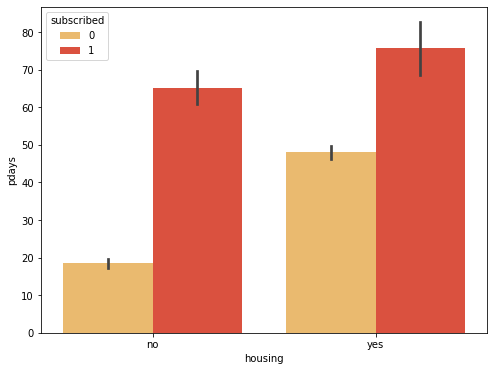

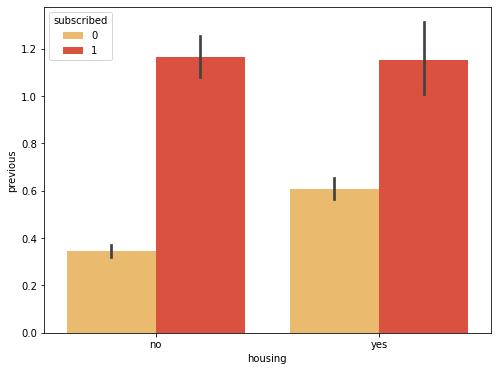

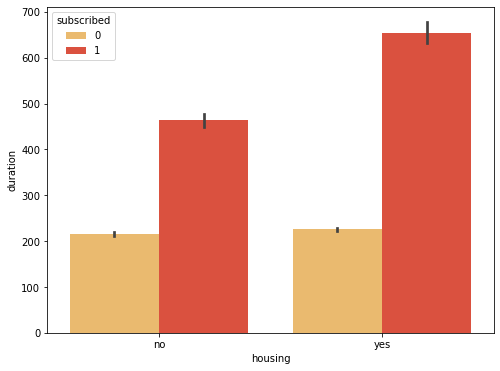

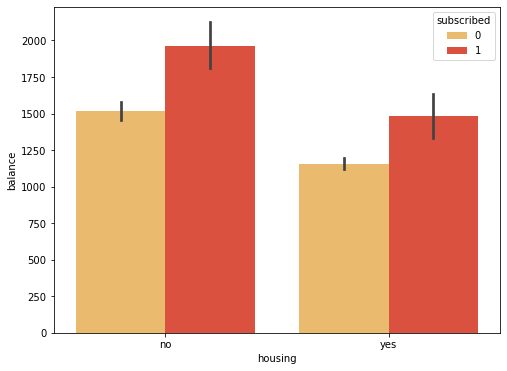

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 576x432 with 0 Axes>

In [47]:
num_columns=["age","pdays","previous","duration","balance","marital","balance","job","education","loan","housing","month"]
for i in num_columns:
    plt.figure(figsize=(8,6))
    ax=sns.barplot(y=bank_train[i],x=bank_train["housing"],hue="subscribed",data=bank_train,palette="YlOrRd")
    plt.show()

# after visualization lets do some preprocessing

In [31]:
corr1=bank_train.corr()
corr1

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


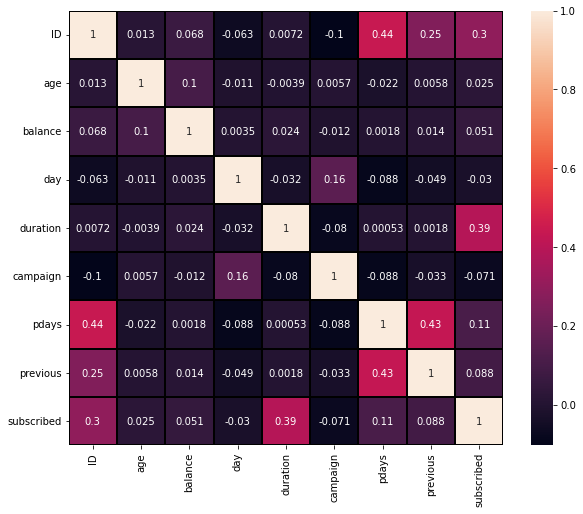

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1,annot=True,annot_kws={"size":10},square=True,linewidth=2,linecolor="black")
plt.show()

AS you can see that duration is having strong coorelation with subscribed and day is having negaive coorelation with 

In [33]:
corr2=bank_test.corr()
corr2

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


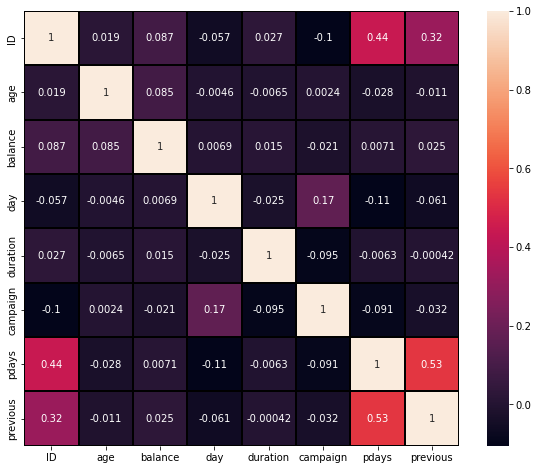

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2,annot=True,annot_kws={"size":10},square=True,linewidth=2,linecolor="black")
plt.show()

As you can clealry see that pdays is having very strong coorelation with previous 

In [35]:
# let's use label encoder to convert categorical variable to numerical variable
from sklearn.preprocessing import LabelEncoder
cat_col=["job","education","loan","duration","marital","poutcome","month","housing","default","contact"]
le=LabelEncoder()
for col in cat_col:
    bank_train[col] = le.fit_transform(bank_train[col])


In [36]:
bank_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,43,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,90,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,239,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,864,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,379,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,115,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,437,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,36,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,21,7,337,12,0,0


In [37]:
bank_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# check null values

As you can see we use the label encoder to encode the categorical variable and we convert it into numerical variable

In [38]:
column12=bank_train.columns
column12

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

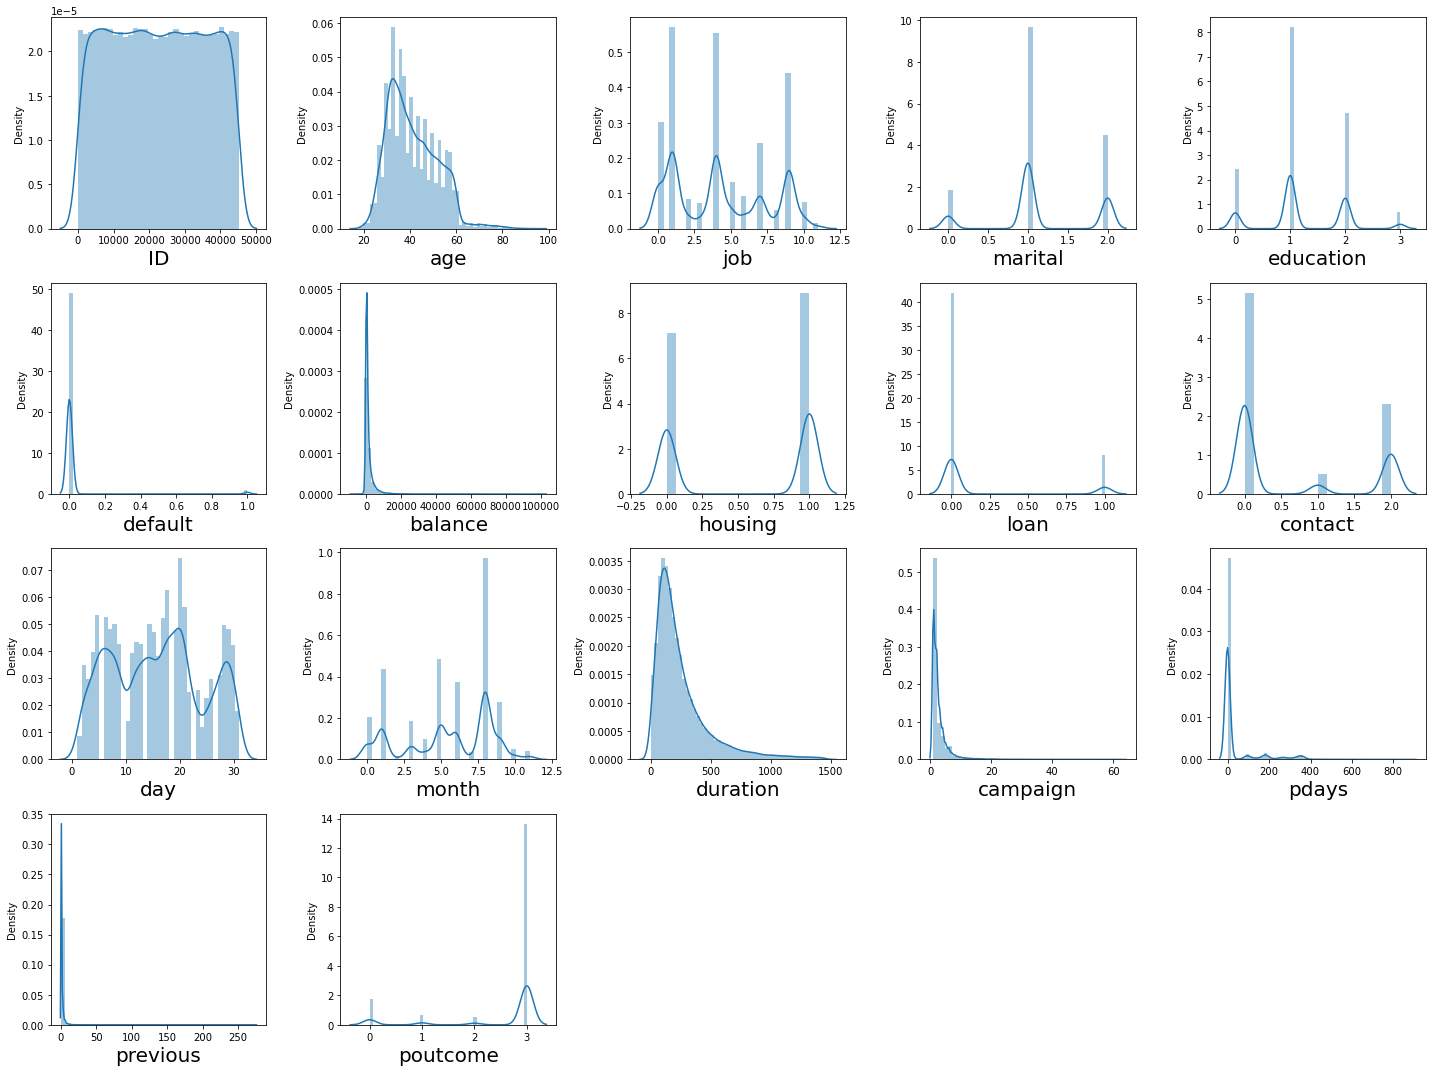

In [39]:
# Now let's check the skweness in the dataset by visual 
plt.figure(figsize=(20,15))
plotnumber=1
for i in column12:
    if plotnumber <=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(bank_train[i])
        plt.xlabel(i ,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
bank_train.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       2.120862
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

As you can see that few of the features like campaign , default, previous have very high skweness we have to reduce the skweness 

In [41]:
skwe_col =["previous","default","campaign","balance"]
for i in skwe_col:
    bank_train[i]=np.sqrt(bank_train[i])

In [42]:
bank_train.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       1.886565
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      2.120862
campaign      2.225079
pdays         2.642374
previous      2.979019
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [43]:
 bank_train["default"]=np.sqrt(bank_train["default"])

In [44]:
bank_train.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       1.886565
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      2.120862
campaign      2.225079
pdays         2.642374
previous      2.979019
poutcome     -1.996421
subscribed    2.377445
dtype: float64

As you can see we have removed the skweness of the dataset but deafult skweness is not removing so we drop the deafult column

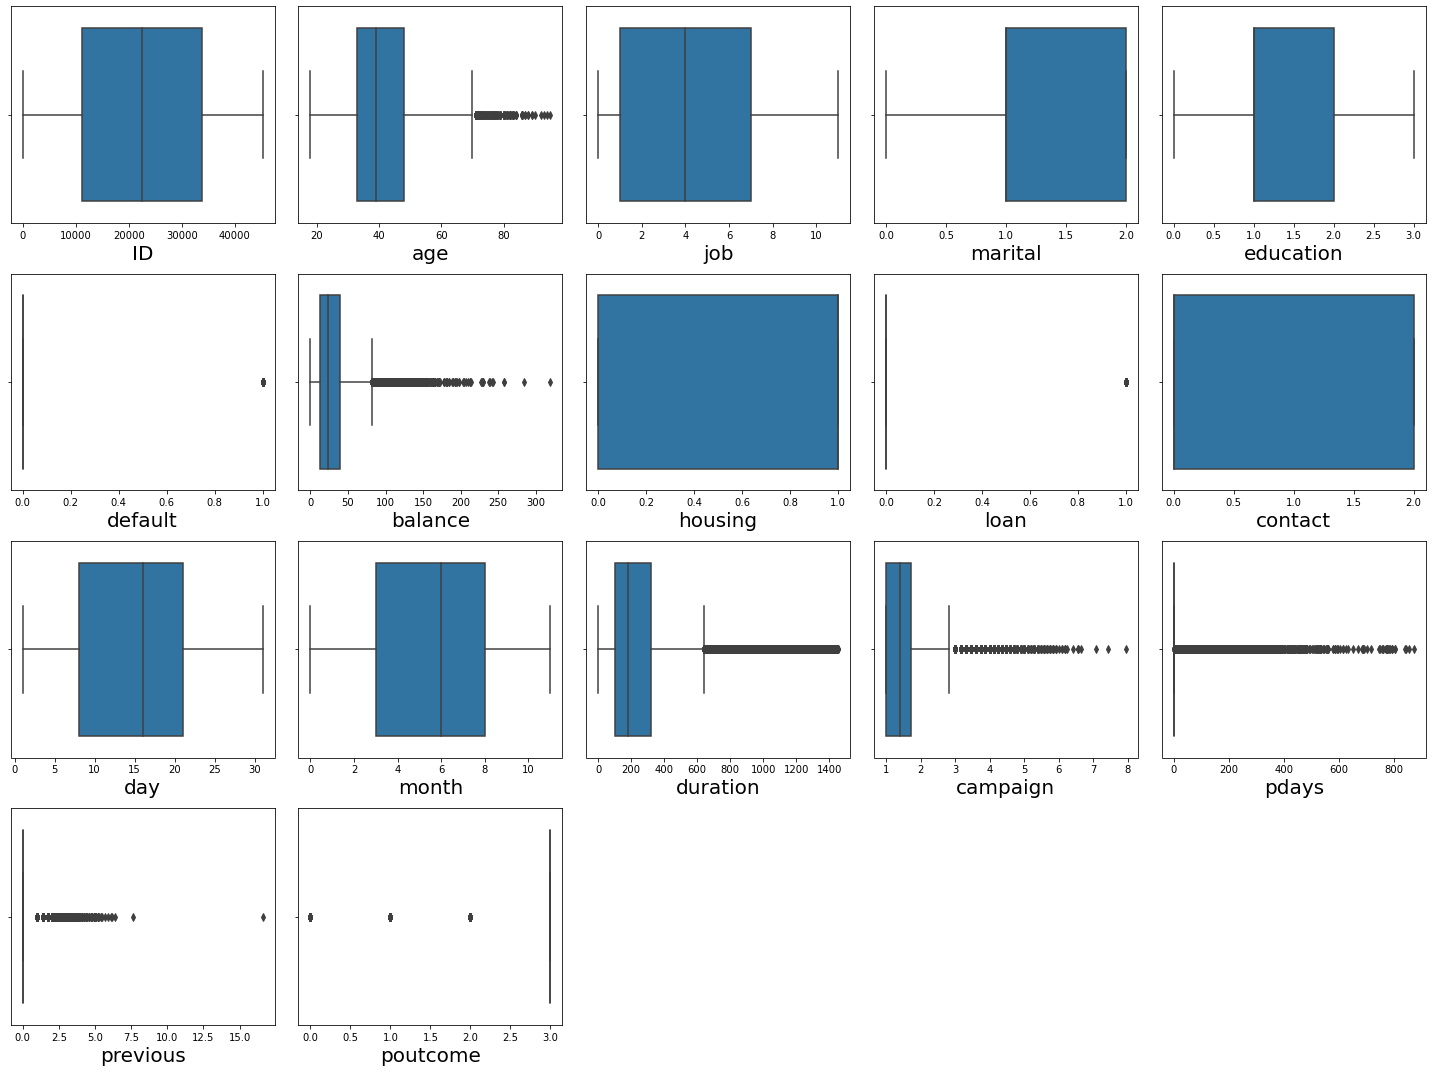

In [45]:
# let;s plot boxplot to check outliers
plt.figure(figsize=(20,15))
plotnumber=1
for i in column12:
    if plotnumber <=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(bank_train[i])
        plt.xlabel(i ,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As you can see therer is almost no outliers in many of the columns so there is no need to find the outliers 

In [46]:
bank_train.isnull().sum()

ID               0
age              0
job              0
marital          0
education        0
default          0
balance       2665
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64

In [47]:
bank_train["balance"]=bank_train["balance"].fillna(0)

In [48]:
bank_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [49]:
bank_train.drop(columns="ID",inplace=True)

In [50]:
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0.0,43.965896,0,0,1,19,9,43,1.414214,-1,0.000000,3,0
1,31,11,1,1,0.0,1.732051,0,0,0,20,5,90,1.414214,-1,0.000000,3,0
2,27,7,1,1,0.0,29.849623,1,0,0,18,5,239,1.000000,-1,0.000000,3,0
3,57,4,0,2,0.0,57.332364,0,0,0,22,6,864,1.000000,84,1.732051,2,1
4,31,9,1,1,0.0,10.908712,1,0,0,4,3,379,1.000000,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0.0,0.000000,1,0,0,12,8,115,1.414214,-1,0.000000,3,0
31643,53,4,0,2,0.0,19.493589,0,1,0,5,6,437,1.414214,-1,0.000000,3,1
31644,32,4,2,2,0.0,17.663522,0,0,0,7,1,36,1.732051,-1,0.000000,3,0
31645,57,9,1,1,0.0,15.000000,1,0,1,15,8,21,2.645751,337,3.464102,0,0


In [51]:
bank_train["subscribed"].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

As you can see our target variable is not balnced we have to balnced it 

In [52]:
# Now let's seprate the target variable from features
x=bank_train.drop(columns="subscribed",axis=1)
y=bank_train["subscribed"]

# now let's scaled our data so it will give equal weightage 

In [53]:
# we will use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.493506,0.000000,0.5,1.000000,0.0,0.137577,0.0,0.0,0.5,0.600000,0.818182,0.029594,0.059709,0.000000,0.000000,1.000000
1,0.168831,1.000000,0.5,0.333333,0.0,0.005420,0.0,0.0,0.0,0.633333,0.454545,0.061941,0.059709,0.000000,0.000000,1.000000
2,0.116883,0.636364,0.5,0.333333,0.0,0.093405,1.0,0.0,0.0,0.566667,0.454545,0.164487,0.000000,0.000000,0.000000,1.000000
3,0.506494,0.363636,0.0,0.666667,0.0,0.179403,0.0,0.0,0.0,0.700000,0.545455,0.594632,0.000000,0.097477,0.104447,0.666667
4,0.168831,0.818182,0.5,0.333333,0.0,0.034135,1.0,0.0,0.0,0.100000,0.272727,0.260840,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.142857,0.363636,1.0,0.666667,0.0,0.000000,1.0,0.0,0.0,0.366667,0.727273,0.079147,0.059709,0.000000,0.000000,1.000000
31643,0.454545,0.363636,0.0,0.666667,0.0,0.060999,0.0,1.0,0.0,0.133333,0.545455,0.300757,0.059709,0.000000,0.000000,1.000000
31644,0.181818,0.363636,1.0,0.666667,0.0,0.055272,0.0,0.0,0.0,0.200000,0.090909,0.024776,0.105525,0.000000,0.000000,1.000000
31645,0.506494,0.818182,0.5,0.333333,0.0,0.046938,1.0,0.0,0.5,0.466667,0.727273,0.014453,0.237234,0.387615,0.208893,0.000000


In [54]:
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0.0,43.965896,0,0,1,19,9,43,1.414214,-1,0.000000,3,0
1,31,11,1,1,0.0,1.732051,0,0,0,20,5,90,1.414214,-1,0.000000,3,0
2,27,7,1,1,0.0,29.849623,1,0,0,18,5,239,1.000000,-1,0.000000,3,0
3,57,4,0,2,0.0,57.332364,0,0,0,22,6,864,1.000000,84,1.732051,2,1
4,31,9,1,1,0.0,10.908712,1,0,0,4,3,379,1.000000,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0.0,0.000000,1,0,0,12,8,115,1.414214,-1,0.000000,3,0
31643,53,4,0,2,0.0,19.493589,0,1,0,5,6,437,1.414214,-1,0.000000,3,1
31644,32,4,2,2,0.0,17.663522,0,0,0,7,1,36,1.732051,-1,0.000000,3,0
31645,57,9,1,1,0.0,15.000000,1,0,1,15,8,21,2.645751,337,3.464102,0,0


In [57]:
# now lets's check VIF values to find the mullticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif_data["faeture"]=x.columns

In [58]:
print(vif_data)

          VIF    faeture
0    6.079821        age
1    2.832730        job
2    5.085765    marital
3    3.777470  education
4    1.040859    default
5    2.200333    balance
6    2.573054    housing
7    1.212989       loan
8    2.002208    contact
9    4.168356        day
10   5.339887      month
11   2.160528   duration
12   1.747686   campaign
13   3.464351      pdays
14   3.356125   previous
15  16.739028   poutcome


In [59]:
# As you can see there is high multicollinearity in poutcome let's drop this column
x.drop(["poutcome"],axis=1,inplace=True)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,0.493506,0.000000,0.5,1.000000,0.0,0.137577,0.0,0.0,0.5,0.600000,0.818182,0.029594,0.059709,0.000000,0.000000
1,0.168831,1.000000,0.5,0.333333,0.0,0.005420,0.0,0.0,0.0,0.633333,0.454545,0.061941,0.059709,0.000000,0.000000
2,0.116883,0.636364,0.5,0.333333,0.0,0.093405,1.0,0.0,0.0,0.566667,0.454545,0.164487,0.000000,0.000000,0.000000
3,0.506494,0.363636,0.0,0.666667,0.0,0.179403,0.0,0.0,0.0,0.700000,0.545455,0.594632,0.000000,0.097477,0.104447
4,0.168831,0.818182,0.5,0.333333,0.0,0.034135,1.0,0.0,0.0,0.100000,0.272727,0.260840,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.142857,0.363636,1.0,0.666667,0.0,0.000000,1.0,0.0,0.0,0.366667,0.727273,0.079147,0.059709,0.000000,0.000000
31643,0.454545,0.363636,0.0,0.666667,0.0,0.060999,0.0,1.0,0.0,0.133333,0.545455,0.300757,0.059709,0.000000,0.000000
31644,0.181818,0.363636,1.0,0.666667,0.0,0.055272,0.0,0.0,0.0,0.200000,0.090909,0.024776,0.105525,0.000000,0.000000
31645,0.506494,0.818182,0.5,0.333333,0.0,0.046938,1.0,0.0,0.5,0.466667,0.727273,0.014453,0.237234,0.387615,0.208893


In [60]:
# again we have to check vif
vif=pd.DataFrame()
vif["VIf ?Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"]=x.columns
vif

,VIf ?Values,features
0,4.371753,age
1,2.755762,job
2,4.079649,marital
3,3.588339,education
4,1.039136,default
5,2.194492,balance
6,2.469779,housing
7,1.205425,loan
8,1.987069,contact
9,3.935156,day


In [61]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [65]:
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

# Now we build our model 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Random Forest classifier

In [67]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        RFR = RandomForestClassifier()
        
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 162
 best_accuracy_score:-  95.10426922044213


In [68]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=162)
RFR=RandomForestClassifier()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of random forest classifier is ")
print(conf)
print("classification_report of random forest classifier at random state is:- ")
print(clas)

confusion matrix of random forest classifier is 
[[5169  380]
 [ 201 5423]]
classification_report of random forest classifier at random state is:- 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5549
           1       0.93      0.96      0.95      5624

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173



# Logistic regression

In [69]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        logistic_r= LogisticRegression()
        
        logistic_r.fit(X_train, y_train)
        y_pred = logistic_r.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 63
 best_accuracy_score:-  82.47561084757898


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=63)
logistic_r= LogisticRegression()
logistic_r.fit(X_train, y_train)
y_pred = logistic_r.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[4648 1005]
 [ 953 4567]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5653
           1       0.82      0.83      0.82      5520

    accuracy                           0.82     11173
   macro avg       0.82      0.82      0.82     11173
weighted avg       0.82      0.82      0.82     11173



# Descion Tree Classifier

In [73]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        dtc=DecisionTreeClassifier()
        
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 102
 best_accuracy_score:-  91.66741251230646


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=102)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[5169  504]
 [ 439 5061]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5673
           1       0.91      0.92      0.91      5500

    accuracy                           0.92     11173
   macro avg       0.92      0.92      0.92     11173
weighted avg       0.92      0.92      0.92     11173



# Ada Boost Classifier

In [75]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        adb=AdaBoostClassifier()
        
        adb.fit(X_train, y_train)
        y_pred = adb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 125
 best_accuracy_score:-  89.28667323010829


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=125)
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is AdaBoostClassifier")
print(conf)
print("classification_report of AdaBoostClassifier is:- ")
print(clas)

confusion matrix of  is AdaBoostClassifier
[[4985  592]
 [ 605 4991]]
classification_report of AdaBoostClassifier is:- 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5577
           1       0.89      0.89      0.89      5596

    accuracy                           0.89     11173
   macro avg       0.89      0.89      0.89     11173
weighted avg       0.89      0.89      0.89     11173



# Gradient Boosting classifier

In [77]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=random_state)
        GBC=GradientBoostingClassifier()
        
        GBC.fit(X_train, y_train)
        y_pred = GBC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 184
 best_accuracy_score:-  91.76014319809069


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=184)
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is Gradient Booting classfier")
print(conf)
print("classification_report of Gradient boosting Classifier is:- ")
print(clas)

confusion matrix of  is Gradient Booting classfier
[[5001  524]
 [ 355 5293]]
classification_report of Gradient boosting Classifier is:- 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5525
           1       0.91      0.94      0.92      5648

    accuracy                           0.92     11173
   macro avg       0.92      0.92      0.92     11173
weighted avg       0.92      0.92      0.92     11173



# Bagging Classifier

In [79]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        BC=BaggingClassifier()
        
        BC.fit(X_train, y_train)
        y_pred = BC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 181
 best_accuracy_score:-  93.77069721650408


In [80]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=181)
BC=GradientBoostingClassifier()
BC.fit(X_train, y_train)
y_pred = BC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[5032  586]
 [ 378 5177]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5618
           1       0.90      0.93      0.91      5555

    accuracy                           0.91     11173
   macro avg       0.91      0.91      0.91     11173
weighted avg       0.91      0.91      0.91     11173



# As we can see after aplying different model we find "Random forest classfier" have best accuracy but still here we not finished we still don"t know that wether our data is overrfitting our score maybe thats why it giving that accuracy so to check we do croos validation

In [82]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold()


skf_score=cross_val_score(RFR,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

94.16084370315131
[0.878815   0.95865032 0.95623378 0.95900832 0.95533477]
-0.0039014648664723595


In [83]:
# now we do it from logistic regression
skf_score=cross_val_score(logistic_r,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

81.70378109931976
[0.80882485 0.81517945 0.82144455 0.82242907 0.81731113]
0.12066916117184312


In [84]:
# now we do fordesciontreeclassifer
skf_score=cross_val_score(dtc,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

90.23167968379605
[0.79727916 0.92821982 0.9271458  0.93108386 0.92785535]
0.03539017532708022


In [86]:
#now we do it for adaboostclassifier
skf_score=cross_val_score(adb,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

88.03168643886634
[0.80390226 0.89895283 0.89617829 0.90092187 0.90162907]
0.05739010777637732


In [87]:
#now we do it for Bagging Classifier
skf_score=cross_val_score(BC,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

90.2227240884813
[0.81142039 0.92383424 0.92374474 0.9273248  0.92481203]
0.035479731280227744


In [88]:
#now we do it for GradientBoostClassifier
skf_score=cross_val_score(GBC,x1,y1,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

90.2227240884813
[0.81142039 0.92383424 0.92374474 0.9273248  0.92481203]
0.035479731280227744


# From the above we can clealry see that least difference between for GradientBoosting Classifier

# Hyperparameter Tunning

In [92]:
# now we do hyperparametertunning
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100,150],
    'max_depth': [3,4],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2],
    'max_features': ['sqrt'],
    'criterion':['gini','entropy']
}

In [93]:
grid_searchs = GridSearchCV(estimator=RFR, param_grid=params, cv=skf)

In [94]:
grid_searchs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [95]:
grid_searchs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 150}

# now we get our final best_parameters now we use to build our final model

In [97]:
best_model_bank_train=RandomForestClassifier(criterion='gini',max_depth= 4,max_features='sqrt',min_samples_leaf= 2,min_samples_split= 3,n_estimators= 150)
best_model_bank_train.fit(X_train,y_train)
pred=best_model_bank_train.predict(X_test)
ac=accuracy_score(y_test,pred)
accurate=(ac*100)
print("accuracy of our final model is :- ")
print(accurate)

accuracy of our final model is :- 
85.61711268235926


As you can see that our final model prediction score 85 % coorect 

In [98]:
conf_final_model_bank_train=confusion_matrix(y_test,pred)
print("confusion matrix of our final model bank_train is")
print(conf_final_model_bank_train)
clas_final_model_bank_train=classification_report(y_test,pred)
print("Classsification report of our final model titanic is ")
print(clas_final_model_bank_train)

confusion matrix of our final model bank_train is
[[4576 1042]
 [ 565 4990]]
Classsification report of our final model titanic is 
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      5618
           1       0.83      0.90      0.86      5555

    accuracy                           0.86     11173
   macro avg       0.86      0.86      0.86     11173
weighted avg       0.86      0.86      0.86     11173



In [99]:
import pickle
project_name="bank_term_fixed_deposit.pkl"
pickle.dump(best_model_bank_train,open(project_name,'wb'))

In [100]:
import pickle
load_final_model=pickle.load(open('bank_term_fixed_deposit.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

85.61711268235926


# WE CAN SEE OUR PREDICTION FOR TRAIN DATA IS 85%

In [101]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [102]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,11163,11164,11165,11166,11167,11168,11169,11170,11171,11172
predicted,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,1,0
original,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,0,0,1,1,0,0


As you can clealry see that from target_variable_prediction chart that whatever we predicted and  the originally data was matching correctly almost 91.65% correctly so this model is very good 

# NOw we pass our test data to the model to predict

In [103]:
bank_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [104]:
# let's use label encoder to convert categorical variable to numerical variable
from sklearn.preprocessing import LabelEncoder
cat_col2=["job","education","loan","duration","marital","poutcome","month","housing","default","contact"]
le=LabelEncoder()
for col in cat_col2:
    bank_test[col] = le.fit_transform(bank_test[col])

In [105]:
bank_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,19,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,371,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,673,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,64,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,110,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,147,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,157,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,135,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,207,2,91,3,2


In [106]:
bank_test.drop(columns="ID",inplace=True)

In [107]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,19,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,371,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,673,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,64,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,110,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,147,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,157,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,135,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,207,2,91,3,2


In [109]:
bank_test.drop(columns="poutcome",inplace=True)

In [110]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,7,1,1,0,118,1,0,0,15,8,19,6,-1,0
1,78,5,0,0,0,2787,0,0,1,1,5,371,1,-1,0
2,31,6,2,2,0,144,1,0,2,16,8,673,1,-1,0
3,57,7,2,0,0,3777,1,0,1,13,8,64,2,-1,0
4,45,1,0,1,0,-705,0,1,2,3,5,110,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,147,4,-1,0
13560,54,1,1,0,0,2281,1,0,2,20,6,157,1,-1,0
13561,35,5,1,0,0,285,1,0,0,29,4,135,1,-1,0
13562,29,0,2,1,0,464,0,0,0,9,9,207,2,91,3


In [111]:
load_final_model2=pickle.load(open('bank_term_fixed_deposit.pkl','rb'))
final_result2=load_final_model2.predict(bank_test)

In [112]:
print(final_result2)

[1 1 1 ... 1 1 1]


In [113]:
bank_test_data_results = pd.DataFrame(final_result2, columns=['Predicted'])

In [114]:
bank_test_data_results

,Predicted
0,1
1,1
2,1
3,1
4,0
...,...
13559,1
13560,1
13561,1
13562,1


In [115]:
bank_test_data_results.value_counts()

Predicted
1            12745
0              819
dtype: int64

# As you can finall see that we predicted our result of the test data set by looking at new set if client we can say that Maximum number of clints will subscribed to the Fixed term deposit